In [2]:
!pip install country_converter
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import country_converter as coco

import seaborn as sns
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 635.5 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for country_converter: filename=country_converter-0.7.7-py3-none-any.whl size=53786 sha256=6f5483c7945157fdc3617462a6d8dcff6f0ab5fd9c9b943eaddda7cf062b3f3f
  Stored in directory: /root/.cache/pip/wheels/e8/e6/60/61798a8a91462250002293d1c8cc8de90a130119a813277ccc
Successfully built country_converter


In [3]:
ds = pd.read_csv('..//input/data-science-job-salaries/ds_salaries.csv',index_col=0)
ds.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
for col in ds.columns:
    print(col, ds[col].dtype)

work_year int64
experience_level object
employment_type object
job_title object
salary int64
salary_currency object
salary_in_usd int64
employee_residence object
remote_ratio int64
company_location object
company_size object


In [5]:
ds.info()
ds.isnull().sum()
ds.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
#Change format to standarize the dataset describe() output
pd.set_option('display.float_format', lambda x: '%.5f' % x) # Set 5 decimals to eliminate numerical notation
ds.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.00000,607.00000,607.00000,607.00000
mean,2021.40527,324000.06260,112297.86985,70.92257
std,0.69213,1544357.48664,70957.25941,40.70913
min,2020.00000,4000.00000,2859.00000,0.00000
25%,2021.00000,70000.00000,62726.00000,50.00000
50%,2022.00000,115000.00000,101570.00000,100.00000
75%,2022.00000,165000.00000,150000.00000,100.00000
max,2022.00000,30400000.00000,600000.00000,100.00000


In [7]:
converted_company_location = coco.convert(names=ds['company_location'], to="ISO3")
converted_employee_residence = coco.convert(names=ds['employee_residence'], to="ISO3")
ds['employee_residence'] = converted_employee_residence
ds['company_location'] = converted_company_location
top_location = ds['company_location'].value_counts()[:10]
top_residence = ds['employee_residence'].value_counts()[:10]

ds['experience_level'] = ds['experience_level'].replace('EN','Entry-level/Junior')
ds['experience_level'] = ds['experience_level'].replace('MI','Mid-level/Intermediate')
ds['experience_level'] = ds['experience_level'].replace('SE','Senior-level/Expert')
ds['experience_level'] = ds['experience_level'].replace('EX','Executive-level/Director')

ds['employment_type'] = ds['employment_type'].replace('FT','Full-time')
ds['employment_type'] = ds['employment_type'].replace('PT','Part-time')
ds['employment_type'] = ds['employment_type'].replace('CT','Contract')
ds['employment_type'] = ds['employment_type'].replace('FL','Freelance')

ds['company_size'] = ds['company_size'].replace('L','Large')
ds['company_size'] = ds['company_size'].replace('M','Medium')
ds['company_size'] = ds['company_size'].replace('S','Small')

ds['remote_ratio'] = ds['remote_ratio'].replace(0,'No remote')
ds['remote_ratio'] = ds['remote_ratio'].replace(50,'Partially remote')
ds['remote_ratio'] = ds['remote_ratio'].replace(100,'Fully remote')

In [8]:
ds['experience_level'].value_counts().count()

4

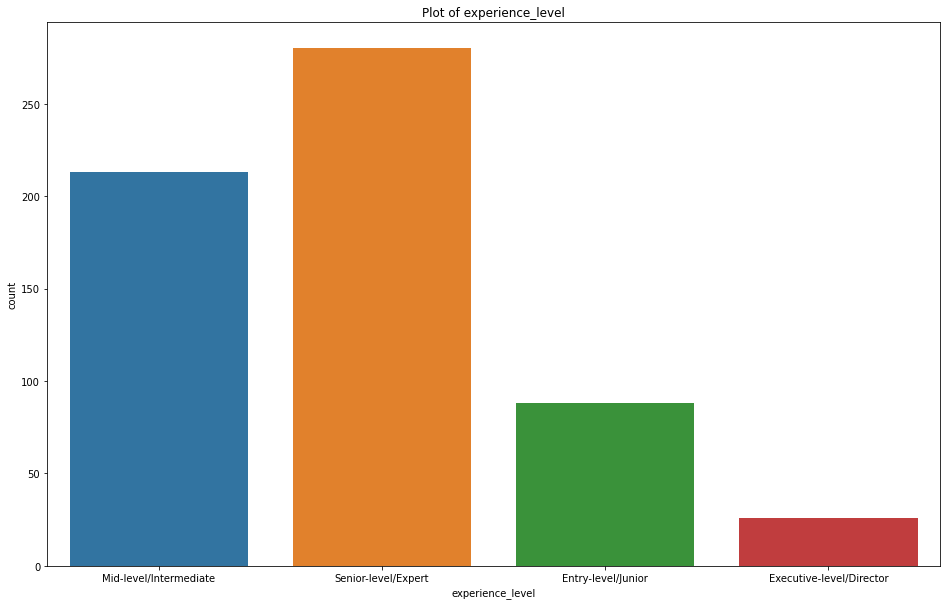

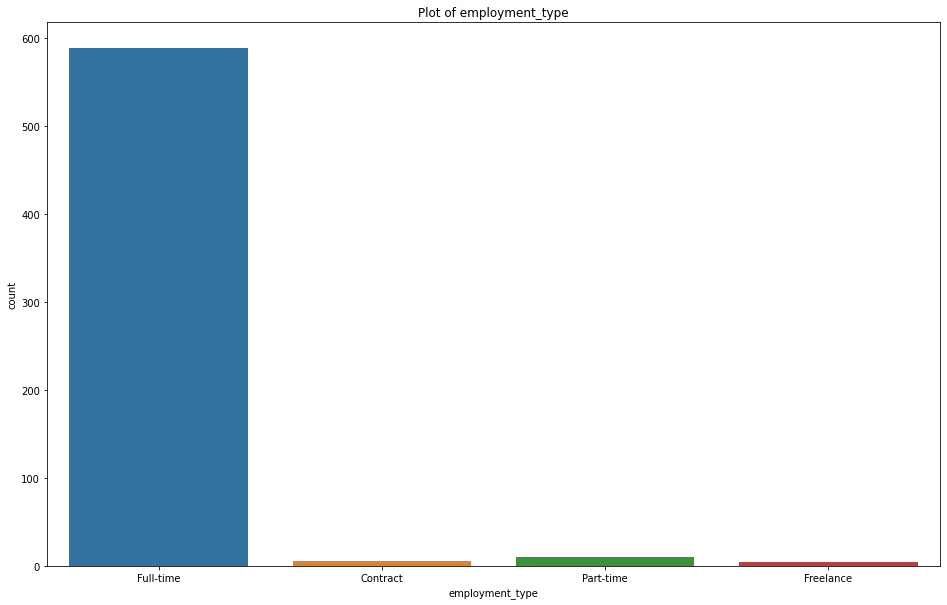

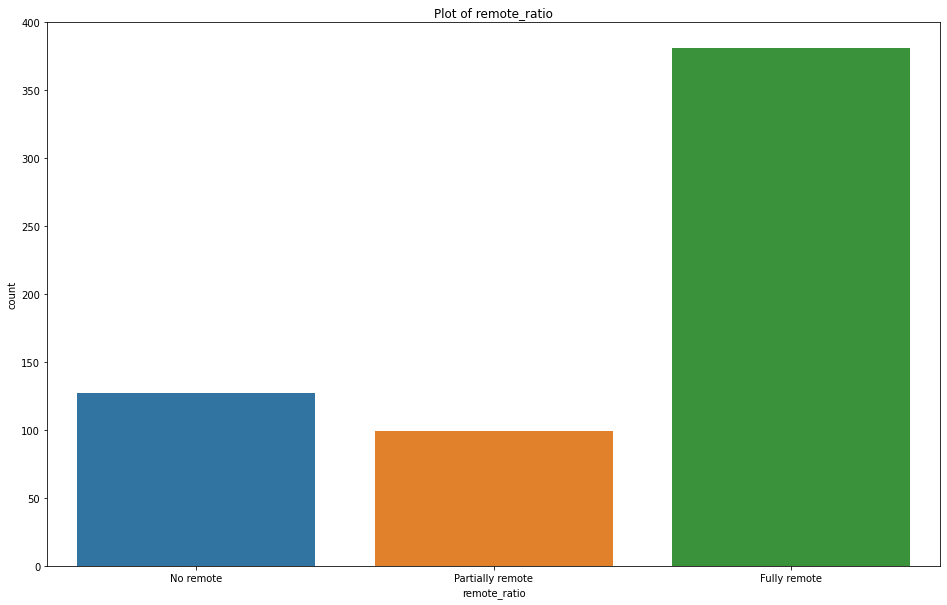

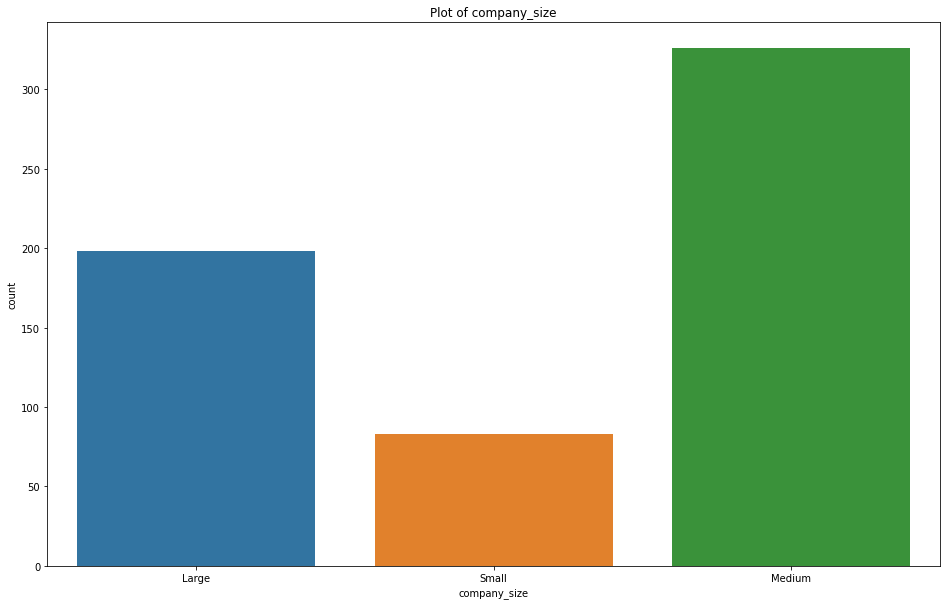

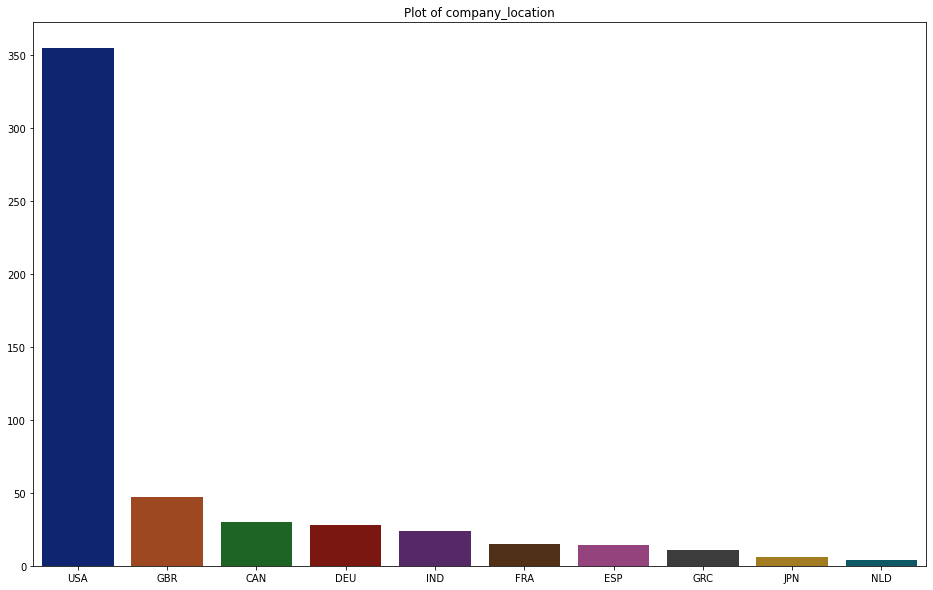

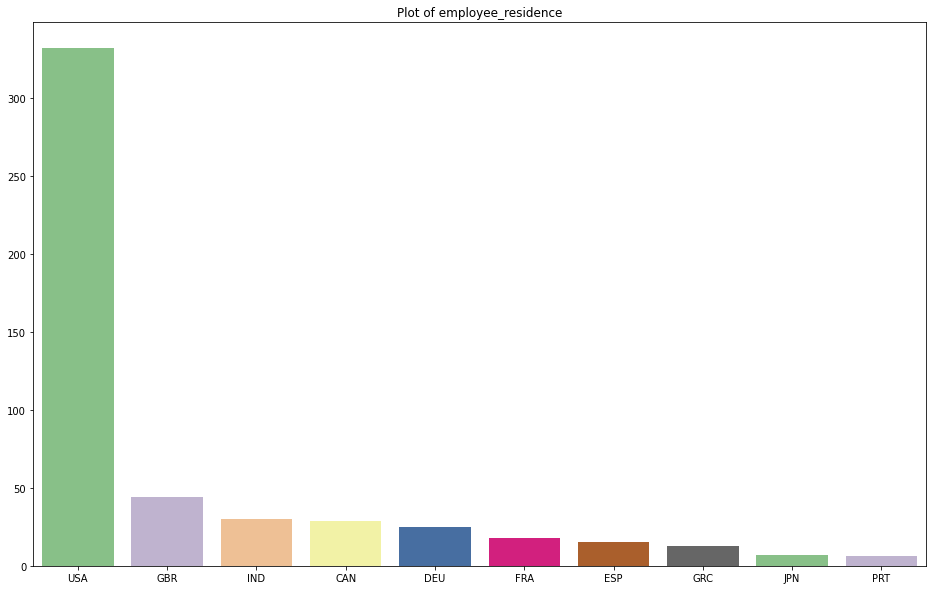

In [9]:
for col in ds.columns:
    if ds[col].dtype in ['object'] and ds[col].value_counts().count()<10:
        plt.figure(figsize=(16,10))
        ax = sns.countplot(data = ds, x = str(col)).set(title="Plot of {}".format(ds[col].name))
        plt.show()

plt.figure(figsize=(16,10))
sns.barplot(data = ds, x = top_location.index, y = top_location.values, palette='dark').set(title="Plot of {}".format(str(top_location.name)))
plt.show()

plt.figure(figsize=(16,10))
sns.barplot(data = ds, x = top_residence.index, y = top_residence.values,palette='Accent').set(title="Plot of {}".format(str(top_residence.name)))
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1152x720 with 0 Axes>

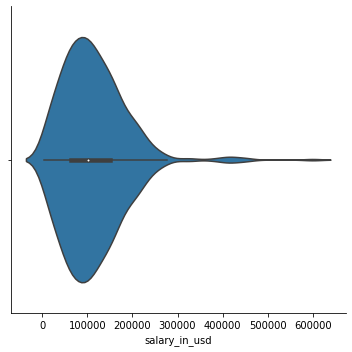

In [10]:
plt.figure(figsize=(16,10))
sns.catplot(data=ds,x='salary_in_usd',kind='violin')
plt.show

In [11]:
ds['change_rate']=ds['salary'].astype(float)/ds['salary_in_usd'].astype(float)

In [12]:
ds.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,change_rate
0,2020,Mid-level/Intermediate,Full-time,Data Scientist,70000,EUR,79833,DEU,No remote,DEU,Large,0.87683
1,2020,Senior-level/Expert,Full-time,Machine Learning Scientist,260000,USD,260000,JPN,No remote,JPN,Small,1.00000
2,2020,Senior-level/Expert,Full-time,Big Data Engineer,85000,GBP,109024,GBR,Partially remote,GBR,Medium,0.77964
3,2020,Mid-level/Intermediate,Full-time,Product Data Analyst,20000,USD,20000,HND,No remote,HND,Small,1.00000
4,2020,Senior-level/Expert,Full-time,Machine Learning Engineer,150000,USD,150000,USA,Partially remote,USA,Large,1.00000


In [13]:
ds.salary_currency.value_counts()

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64

In [14]:

for row in [x for x in ds.salary_currency.unique() if x != 'USD' and x!= 'CHF' and x!= 'CLP']:
    print(row)
    print(ds[['work_year','change_rate']].loc[ds.salary_currency==row])
    print()

EUR
     work_year  change_rate
0         2020      0.87683
10        2020      0.87683
12        2020      0.87684
17        2020      0.87683
22        2020      0.87685
..         ...          ...
500       2022      0.90980
501       2022      0.90981
507       2022      0.90981
513       2022      0.90980
517       2022      0.90980

[95 rows x 2 columns]

GBP
     work_year  change_rate
2         2020      0.77964
44        2020      0.77964
46        2020      0.77965
72        2021      0.72703
105       2021      0.72703
111       2021      0.72703
112       2021      0.72703
123       2021      0.72703
171       2021      0.72703
183       2021      0.72703
212       2021      0.72703
221       2021      0.72703
223       2021      0.72703
245       2021      0.72703
248       2021      0.72703
300       2022      0.76408
301       2022      0.76407
304       2022      0.76407
311       2022      0.76408
312       2022      0.76408
313       2022      0.76408
314       2022  

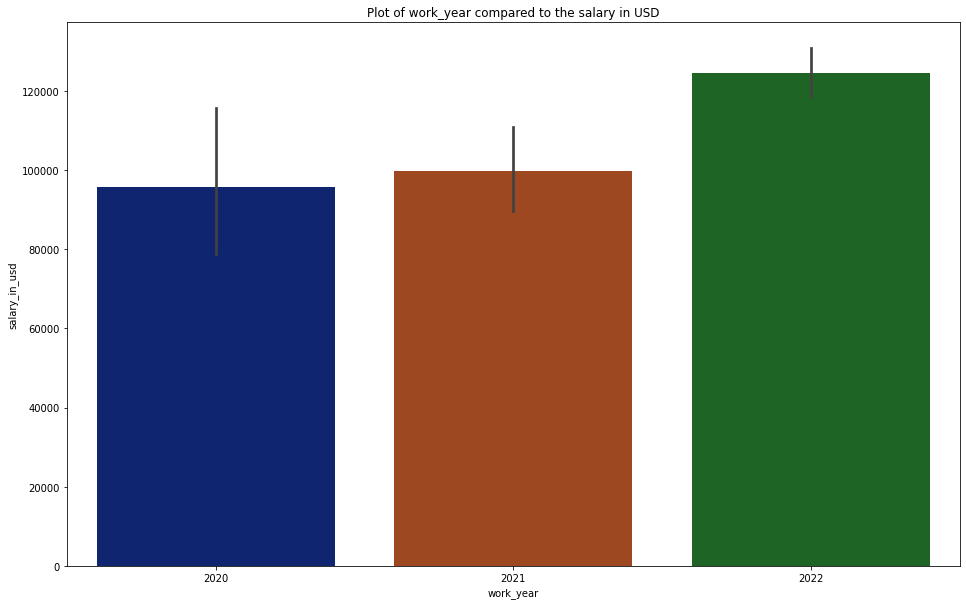

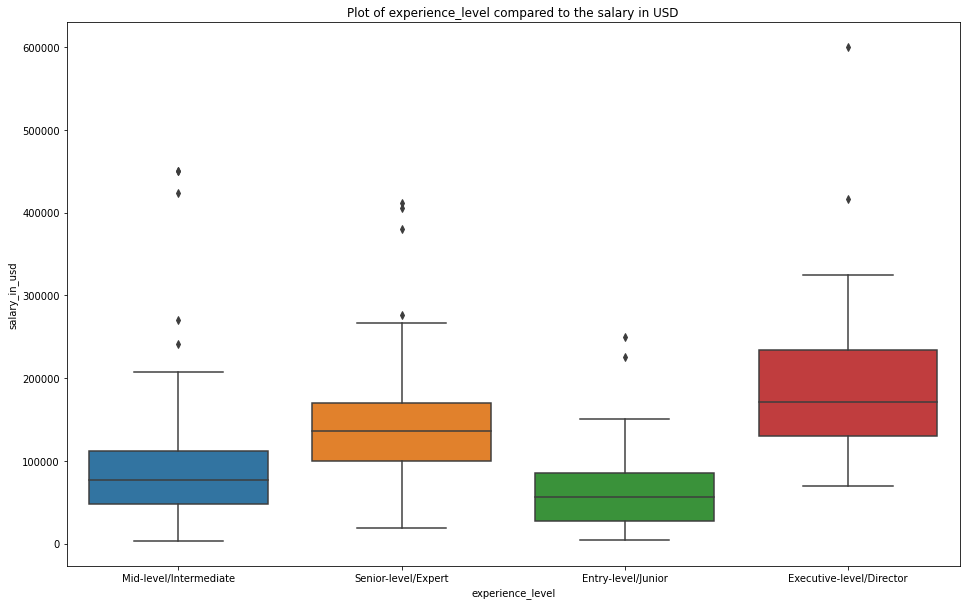

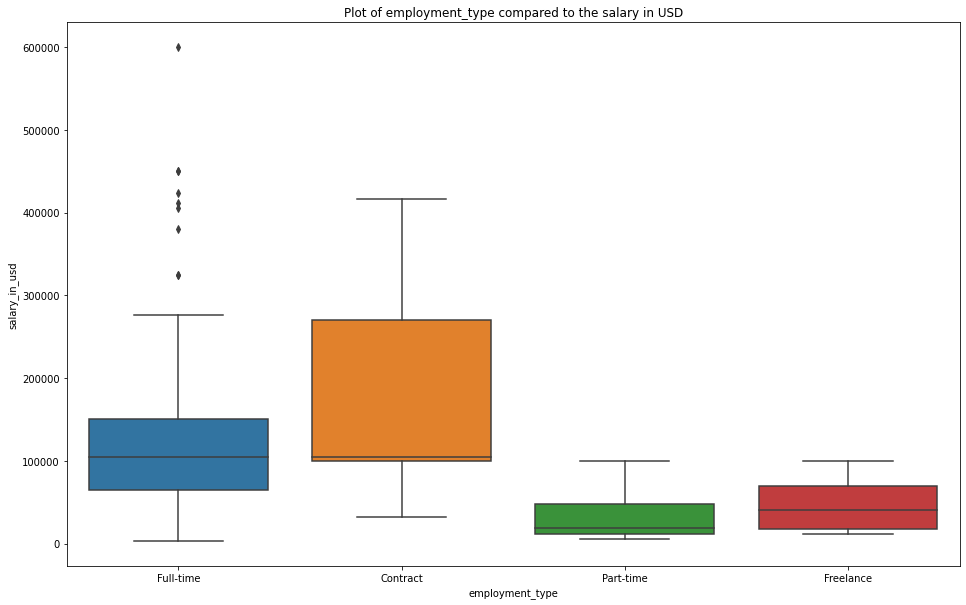

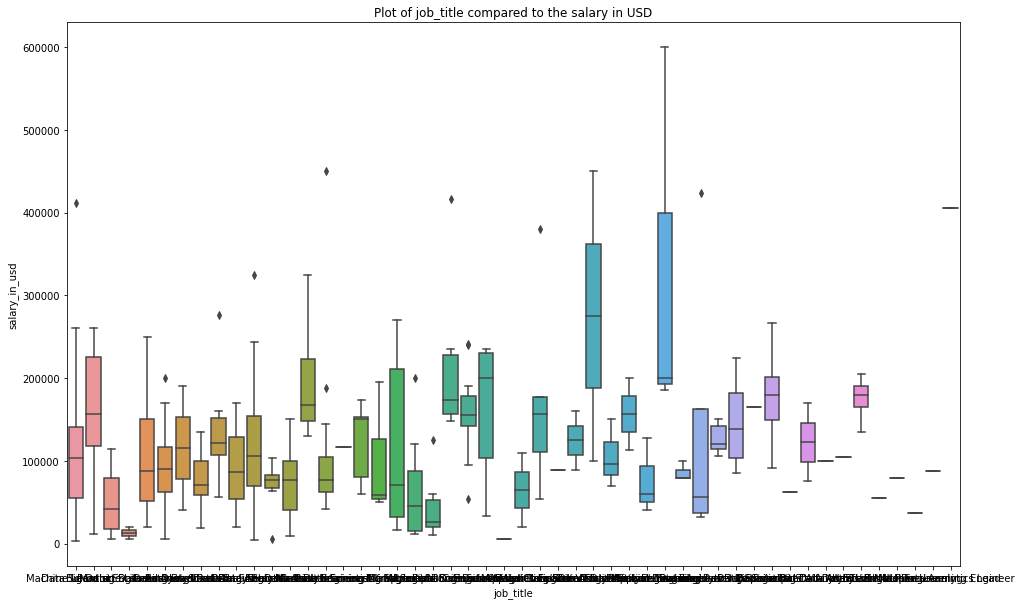

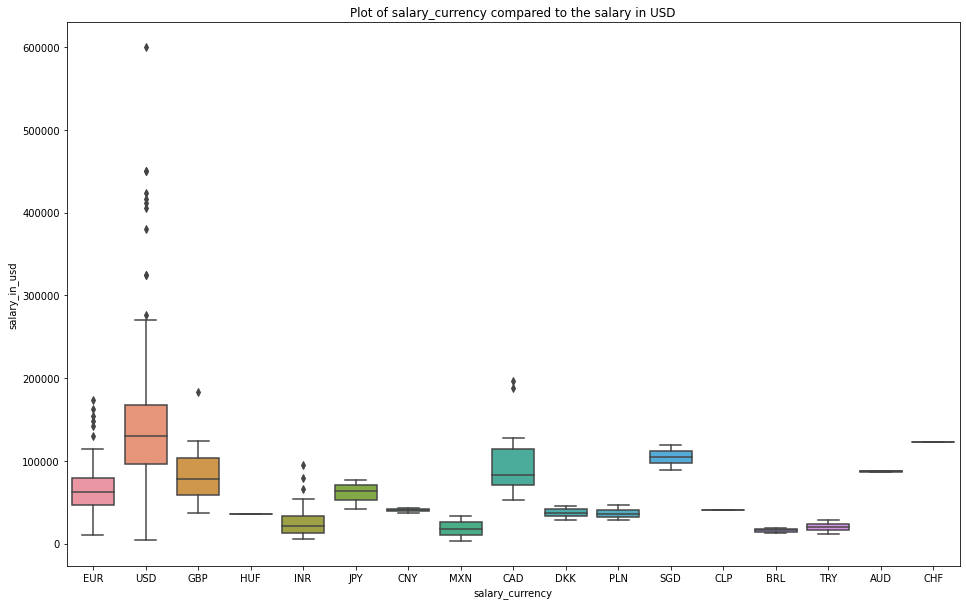

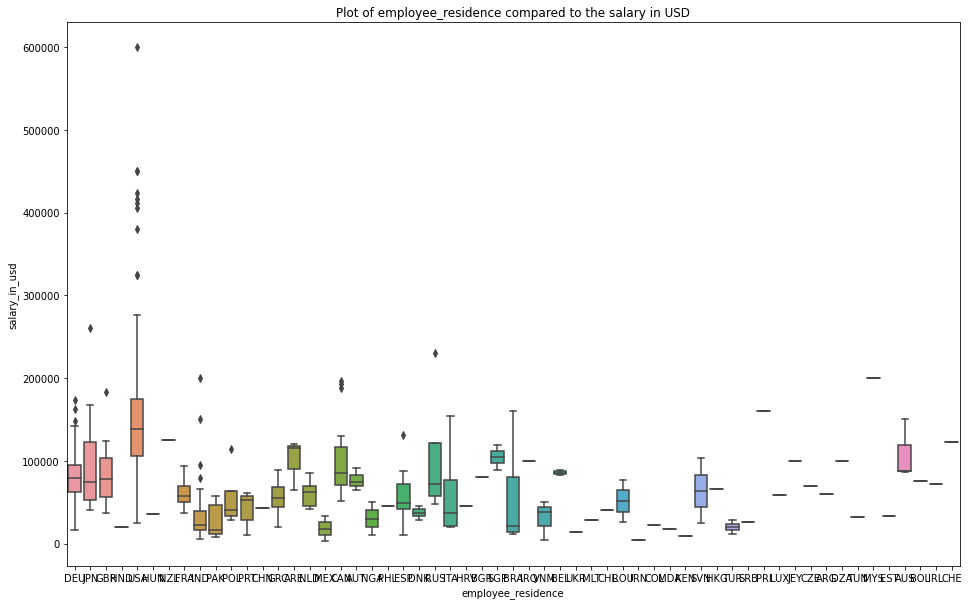

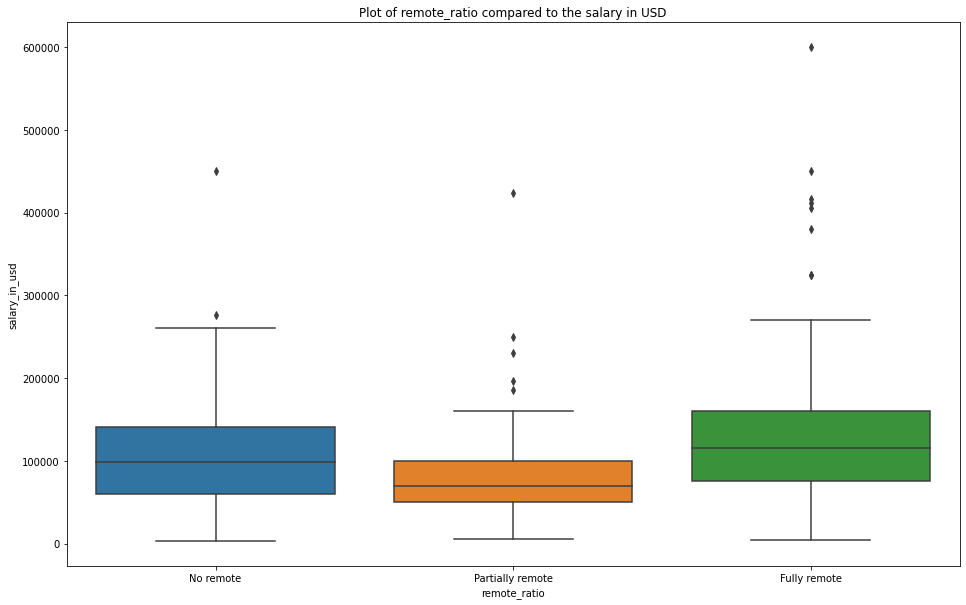

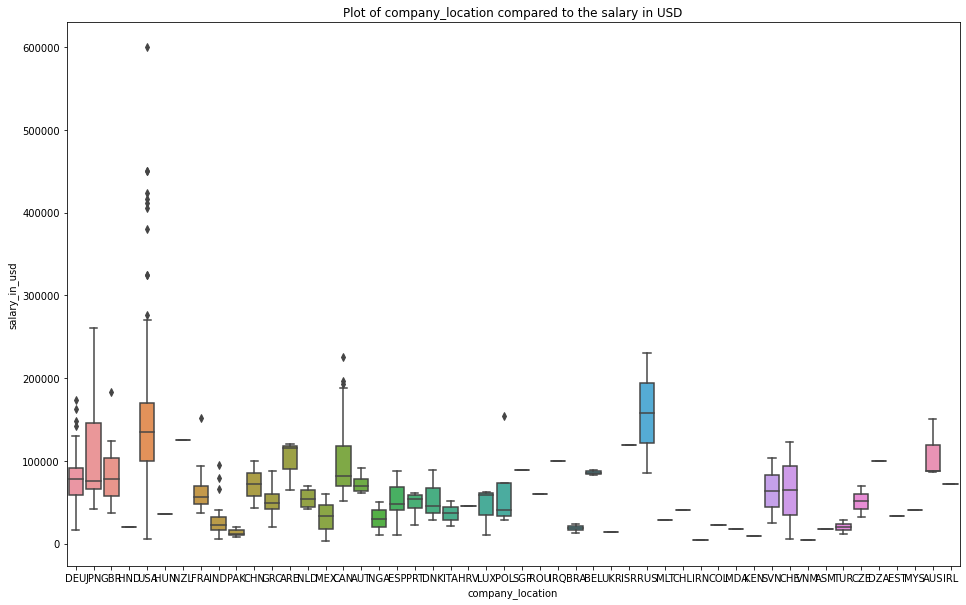

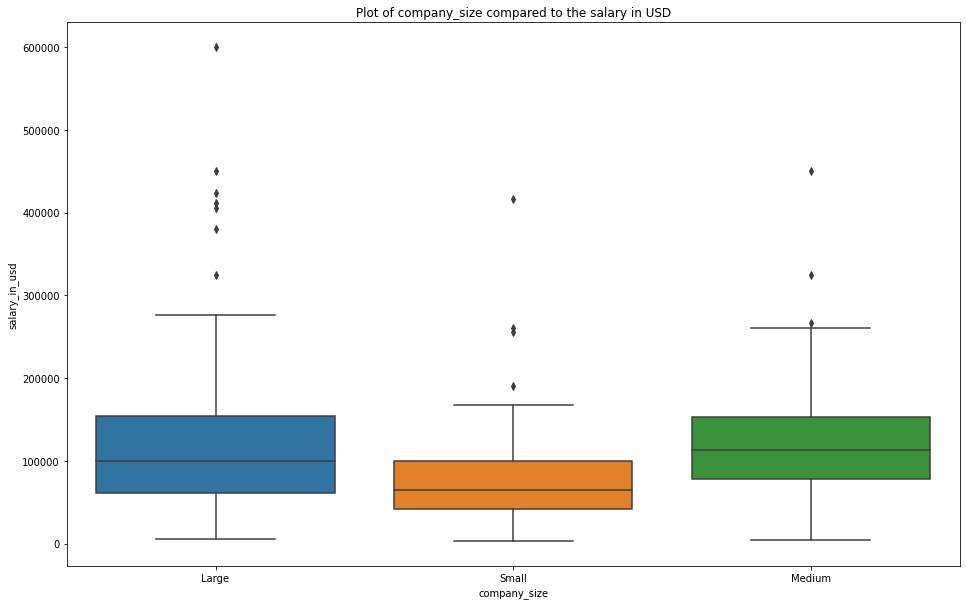

<Figure size 1152x720 with 0 Axes>

In [15]:
for col in [x for x in ds.columns if x!='salary_in_usd' and x!='salary']:
    plt.figure(figsize=(16,10))
    if ds[col].dtype in ['int64']:
        sns.barplot(data = ds, x = str(col), y = "salary_in_usd", palette='dark').set(title="Plot of {} compared to the salary in USD".format(str(col)))
        plt.show()
    elif ds[col].dtype in ['object']:
        sns.boxplot(data = ds, x = str(col), y = "salary_in_usd").set(title="Plot of {} compared to the salary in USD".format(str(col)))
        plt.show()

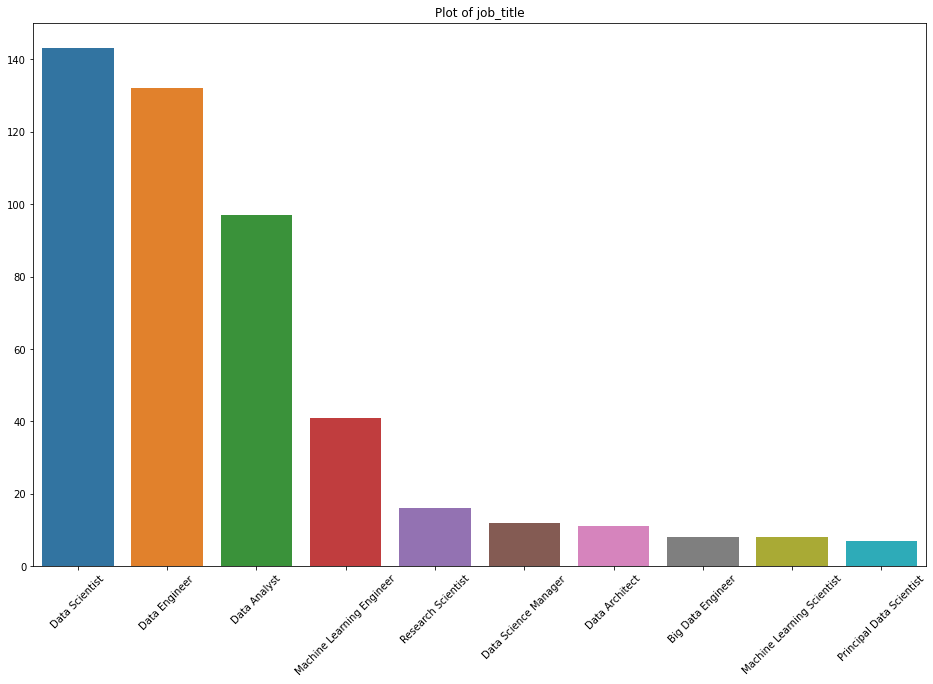

In [16]:
titles = ds['job_title'].value_counts()
top_titles = titles[:10]
plt.figure(figsize=(16,10))
sns.barplot(data = ds, x = top_titles.index, y = top_titles.values).set(title="Plot of {}".format(str(top_titles.name)))
plt.xticks(rotation=45)
plt.show()

<Figure size 1152x720 with 0 Axes>

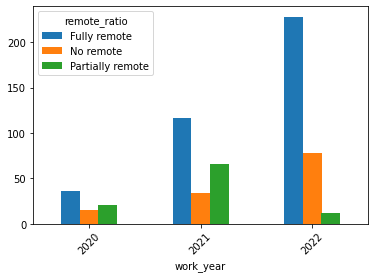

In [40]:
plt.figure(figsize=(16,10))
ds.groupby(['work_year','remote_ratio']).size().unstack().plot.bar(figsize=(16,10))
plt.xticks(rotation=45)
plt.show()

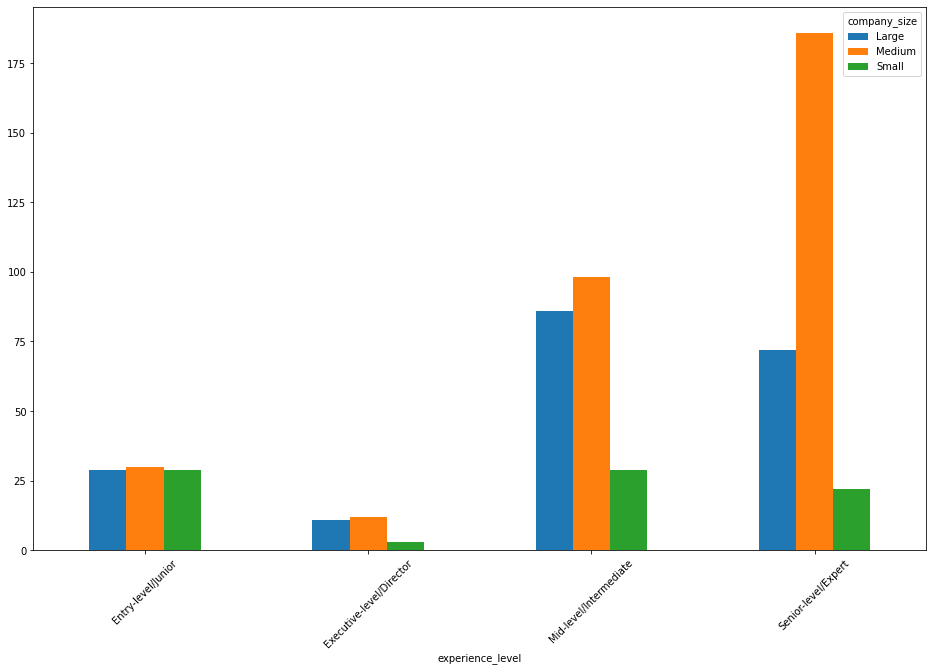

In [44]:

ds.groupby(['experience_level','company_size']).size().unstack().plot.bar(figsize=(16,10))
plt.xticks(rotation=45)
plt.show()

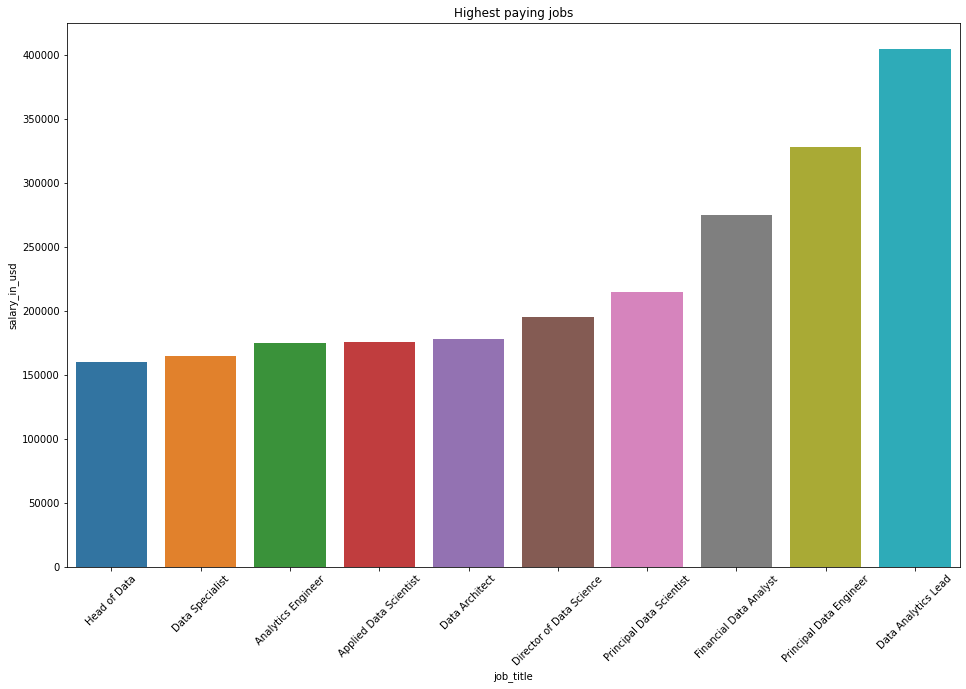

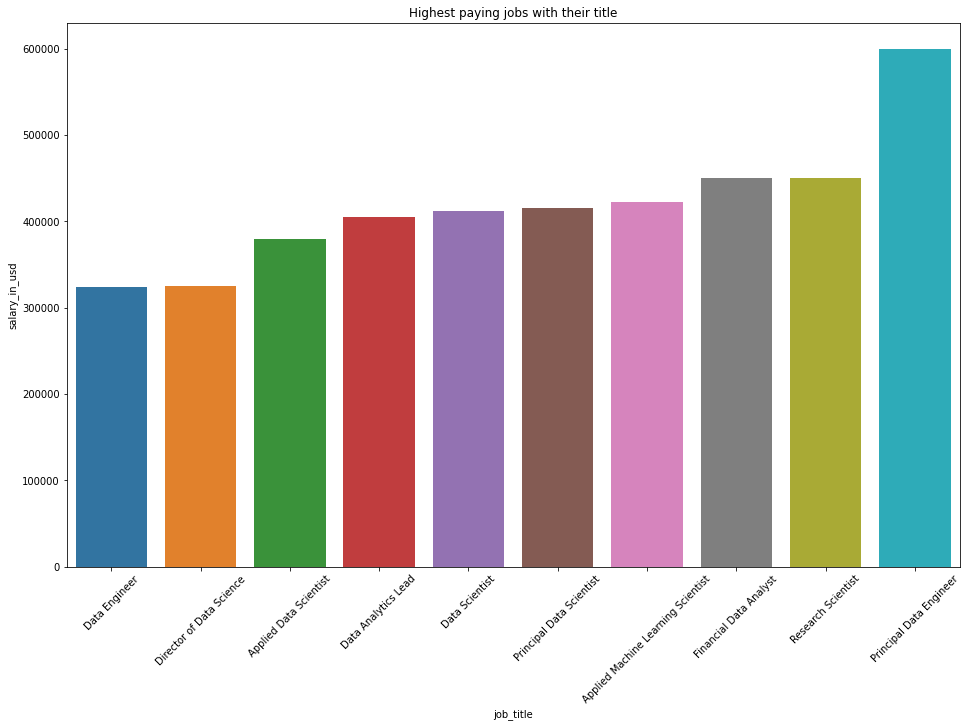

In [19]:
#the 10 highest paying jobs and their roles
salary_job = ds.groupby(['salary_in_usd','job_title']).size().reset_index()
average_sj = salary_job.groupby('job_title',sort=False).mean().reset_index().sort_values(by=['salary_in_usd'])

plt.figure(figsize=(16,10))
sns.barplot(data = average_sj[-10:], x = 'job_title', y = 'salary_in_usd').set(title="Highest paying jobs" )
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(16,10))
sns.barplot(data = salary_job[-10:], x = 'job_title', y = 'salary_in_usd').set(title="Highest paying jobs with their title" )
plt.xticks(rotation=45)
plt.show()

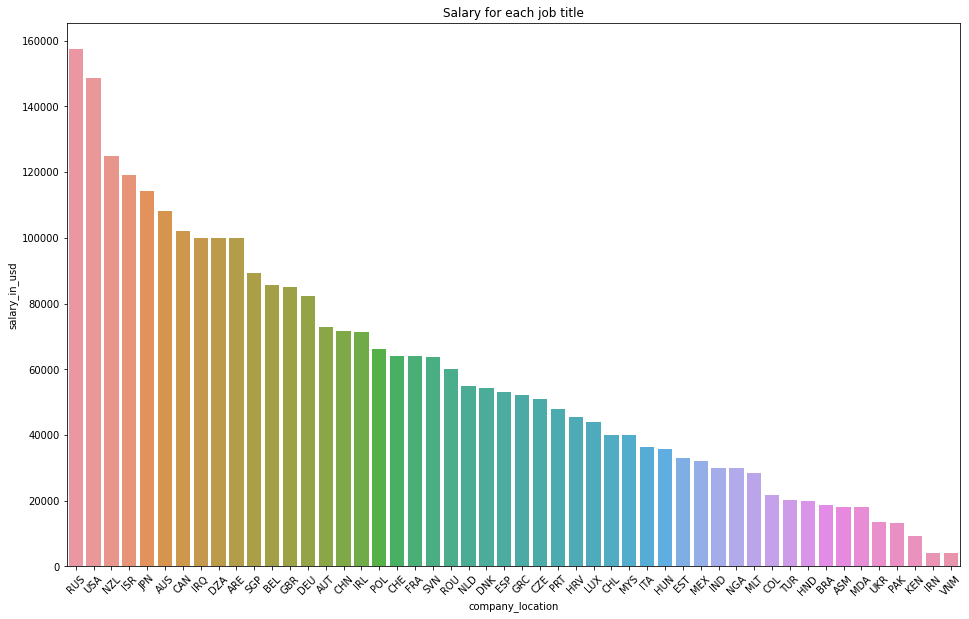

In [20]:
salary_location = ds.groupby(['salary_in_usd','company_location']).size().reset_index()
average_sl = salary_location.groupby('company_location',sort=False).mean().reset_index().sort_values(by=['salary_in_usd'],ascending=False)

plt.figure(figsize=(16,10))
sns.barplot(data = average_sl, x = 'company_location', y = 'salary_in_usd').set(title="Salary for each job title" )
plt.xticks(rotation=45)
plt.show()